In [238]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorrelation and partial autocorrelation function
from statsmodels.tsa.stattools import adfuller # Augmented Dickie-Fuller test
from statsmodels.tsa.stattools import coint #cointegration test

from sklearn.preprocessing import StandardScaler

%matplotlib inline

sns.set()

In [239]:
#load datasets
daily = pd.read_csv('../data/processed/data.csv', index_col= 'time')
weekly = pd.read_csv('../data/processed/weekly_data.csv', index_col= 'time')
monthly = pd.read_csv('../data/processed/monthly_data.csv', index_col= 'time')
annual = pd.read_csv('../data/processed/annual_data.csv', index_col= 'time')

daily.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,block_height,halving_period
time,,,,,,,,,,,,,,,,,,,,,
2021-02-13,1217682.0,157.0,207202403.0,1.319761e+06,3.547737,8.793975e+11,2.478757e+11,2.143440e+13,0.000424,20.024955,...,15270.952475,0.003083,145.550328,301266.723746,1.422239e+10,0.037306,0.054038,0.050728,670494.0,3.0
2021-02-14,1122976.0,148.0,195938399.0,1.323908e+06,3.654753,9.096421e+11,2.488929e+11,2.143440e+13,0.000362,17.653936,...,19695.955050,0.002850,139.185029,335082.097912,1.636200e+10,0.037269,0.052690,0.049690,670642.0,3.0
2021-02-15,1140491.0,152.0,201158432.0,1.323411e+06,3.561481,8.962827e+11,2.516601e+11,2.143440e+13,0.000387,18.621550,...,22901.995728,0.003291,158.327438,433509.608473,2.085625e+10,0.037243,0.052693,0.049376,670794.0,3.0
2021-02-16,989854.0,121.0,157050231.0,1.297936e+06,3.612517,9.155111e+11,2.534275e+11,2.143440e+13,0.000409,20.120530,...,28698.474426,0.003921,192.663224,512488.039291,2.518386e+10,0.037256,0.052680,0.049389,670915.0,3.0
2021-02-17,1134666.0,138.0,177783064.0,1.288283e+06,3.794325,9.730230e+11,2.564416e+11,2.143440e+13,0.000450,23.499134,...,30790.768908,0.004092,213.715418,574879.802173,3.002306e+10,0.037359,0.053482,0.049704,671053.0,3.0


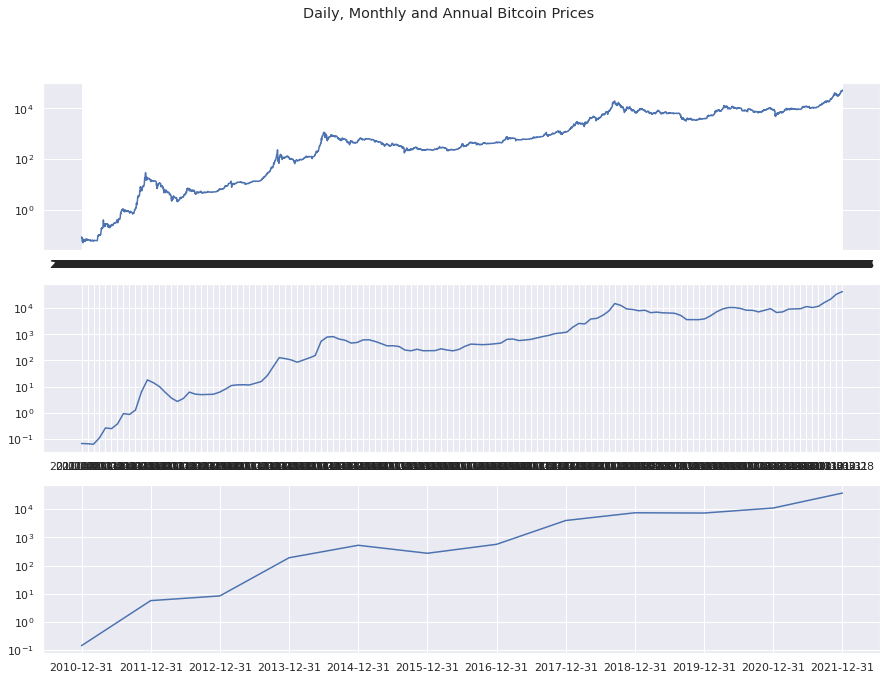

In [240]:
#btc price variable
btc_price_daily = daily['PriceUSD']
btc_price_monthly = monthly['PriceUSD']
btc_price_annual = annual['PriceUSD']


fig, (ax1, ax2, ax3) = plt.subplots(3)
plt.yscale('log')
fig.suptitle('Daily, Monthly and Annual Bitcoin Prices')
fig.set_size_inches(15, 10.5)
ax1.plot(btc_price_daily)
ax1.set_yscale('log')
ax2.plot(btc_price_monthly)
ax2.set_yscale('log')
ax3.plot(btc_price_annual)
ax3.set_yscale('log')
plt.show()


#From the charts below we can observe that the bicoin price series seem to be non-stationary, 
#or random-walk with drift.

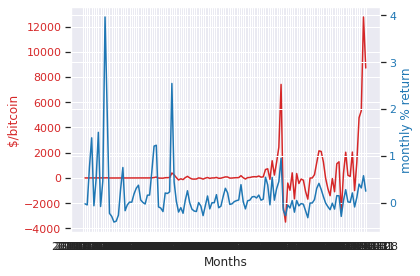

Descriptive statistics of mothly returns
count    127.000000
mean       0.181841
std        0.539182
min       -0.406599
25%       -0.067250
50%        0.049282
75%        0.255230
max        3.959536
Name: PriceUSD, dtype: float64
-----------------------------------------------
Descriptive statistics of mothly $ change
count      127.000000
mean       342.261845
std       1791.221140
min      -3494.460869
25%        -14.142407
50%          1.887697
75%         95.504717
max      12756.984890
Name: PriceUSD, dtype: float64


In [241]:
#Check if first differences seem stationary.
btc_price_monthly_diff = btc_price_monthly.diff()
btc_price_monthly_return = btc_price_monthly.pct_change()

#plot the mothly changes in $ and %
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('$/bitcoin', color=color)
ax1.plot(btc_price_monthly_diff, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('monthly % return', color=color)  
ax2.plot(btc_price_monthly_return, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

print('Descriptive statistics of mothly returns')
print(btc_price_monthly_return.describe())
print('-----------------------------------------------')
print('Descriptive statistics of mothly $ change')
print(btc_price_monthly_diff.describe())

#The monthly differences don't seem stationary, the volatility in $ terms has increased.
#% Change seen to have decreasing volatiltiy. 

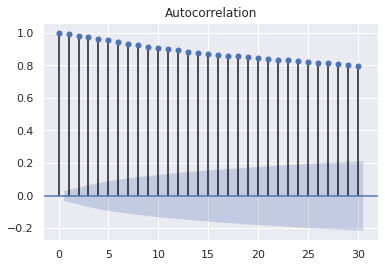

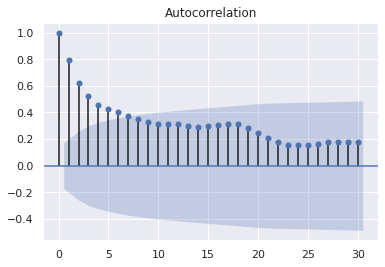

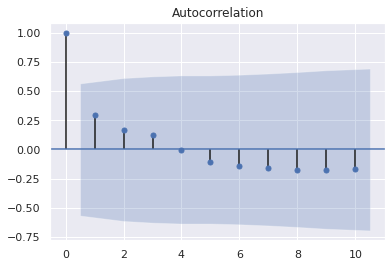

In [242]:
#Check for autocorrelation

plot_acf(btc_price_daily, lags=30, alpha=.05)
plot_acf(btc_price_monthly, lags=30, alpha=.05)
plot_acf(btc_price_annual, lags=10, alpha=.05)
plt.show()

#daily price show a high autocorrelation even 30 days after.
#Monthly price also show high positive autocorrelation for about 9 months.
#Annual prices show 1 year of autocorrelation.
#Positive autocorrelation implies that bitcoin prices trade on momentum or trend following.

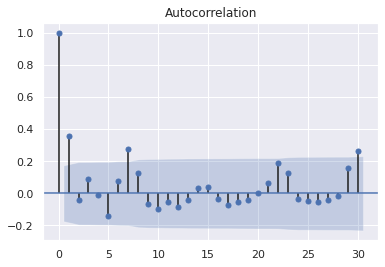

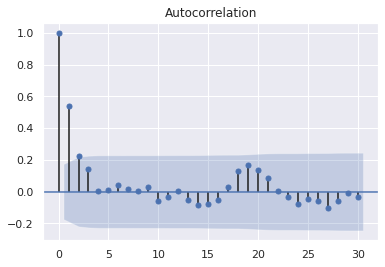

In [243]:
#autocorrelation of monthly returns
plot_acf(btc_price_monthly_return.dropna(), lags=30, alpha=.05)
plt.show()

plot_acf(btc_price_monthly_diff.dropna(), lags=30, alpha=.05)
plt.show()

#First difference are autocorrelated order 1.

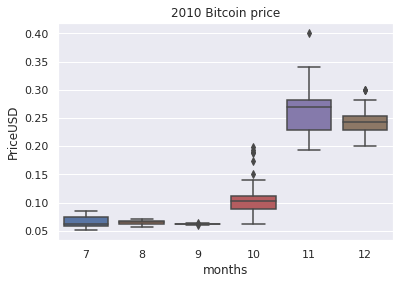

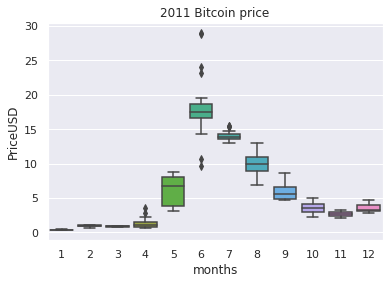

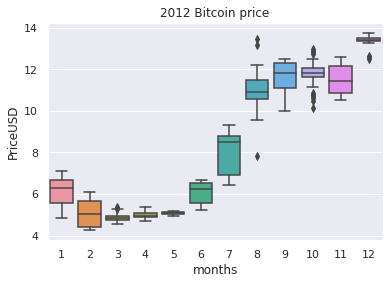

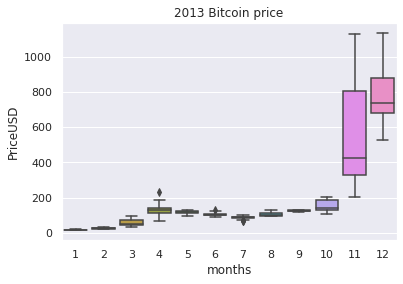

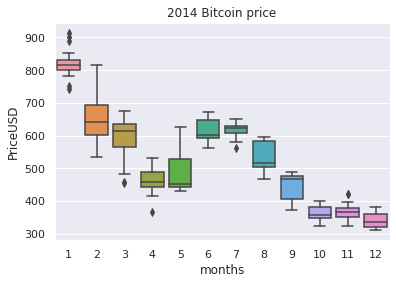

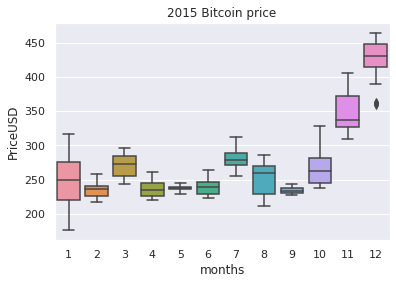

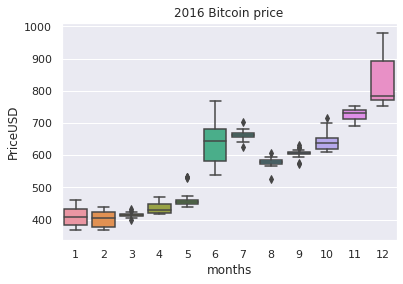

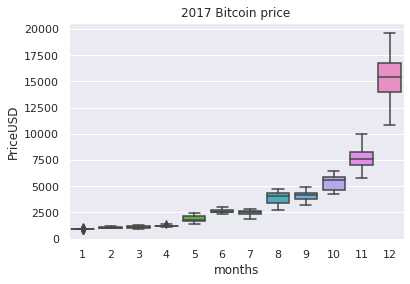

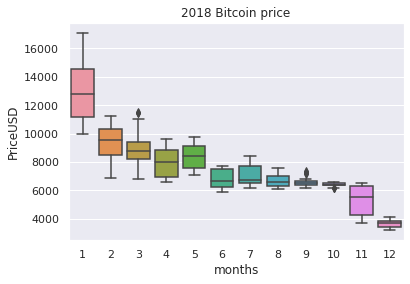

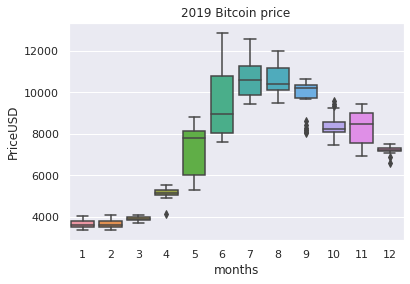

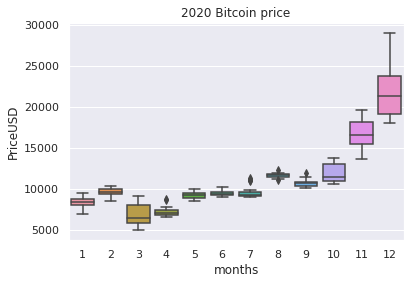

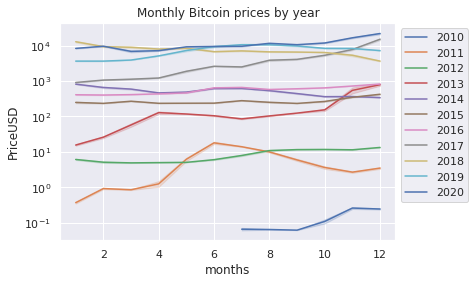

In [244]:
#check for seasonality
daily['months'] = pd.to_datetime(daily.index).month
daily['years'] = pd.to_datetime(daily.index).year

years = daily['years'].unique()[:-1]

for year in years:
    yearly_prices = daily[daily['years'] == year]
    f, axes = plt.subplots(1, 1)
    sns.boxplot(x='months', y='PriceUSD', data=yearly_prices)
    plt.title('{} Bitcoin price'.format(year))
    plt.show()

for year in years:
    yearly_prices = daily[daily['years'] == year]
    #plt.scatter(daily['months'], daily['PriceUSD'])
    sns.lineplot(x='months', y='PriceUSD', data=yearly_prices, label=year)
    plt.title('Monthly Bitcoin prices by year')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.yscale('log')
plt.show()

#It seems that prices tend to change more drastically in the second half of the year, specially in years where
#they are trending up.


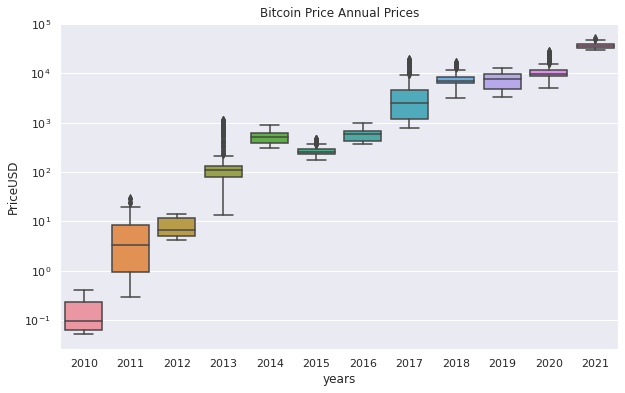

In [245]:
plt.figure(figsize=(10,6))
ay = sns.boxplot(x='years', y='PriceUSD', data=daily, orient='v')
ay.set(yscale="log")
plt.title('Bitcoin Price Annual Prices')
plt.show()

<ipython-input-246-f1d609a82944>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_monthly_return_df['monthly_return'] = price_monthly_return_df['PriceUSD'].pct_change() * 100
<ipython-input-246-f1d609a82944>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_monthly_return_df['month'] = pd.to_datetime(price_monthly_return_df.index).month


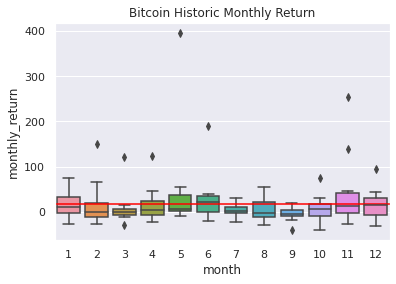

Average monthly return: 18


In [246]:
#Monthly % return seasonality
price_monthly_return_df = monthly[['PriceUSD']] 
price_monthly_return_df['monthly_return'] = price_monthly_return_df['PriceUSD'].pct_change() * 100
price_monthly_return_df['month'] = pd.to_datetime(price_monthly_return_df.index).month

avg_monthly_return = price_monthly_return_df['monthly_return'].mean()

sns.boxplot(x='month', y='monthly_return', data=price_monthly_return_df)
plt.title('Bitcoin Historic Monthly Return')
#plt.ylim(-50,100)
plt.axhline(avg_monthly_return, color='red')
plt.show()
print('Average monthly return: {}'.format(int(avg_monthly_return)))

#The boxplot below shows some high return outliers, above 100% in some months. This 

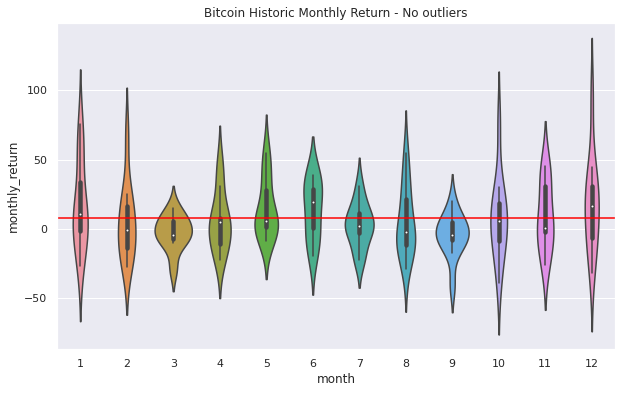

Average monthly return: 7


In [247]:
#Monthly returns with no outliers (% <= 100)
price_monthly_return_no = price_monthly_return_df[price_monthly_return_df['monthly_return'] <= 100]

avg_monthly_return_no = price_monthly_return_no['monthly_return'].mean()

plt.figure(figsize=(10,6))
sns.violinplot(x='month', y='monthly_return', data=price_monthly_return_no)
plt.title('Bitcoin Historic Monthly Return - No outliers')
#plt.ylim(-50,100)
plt.axhline(avg_monthly_return_no, color='red')
plt.savefig('../data/img/historic_monthly_return_boxplot.png')
plt.show()
print('Average monthly return: {}'.format(int(avg_monthly_return_no)))

#Taking outlieers out, average monthly return decreases to 7%.
#Monthly % price returns doesn't seem to have any particular seasonality.

In [248]:
#ADF test for prices and other features.

def adf_test(series, signif=0.05):
    #calculates de Augented Dickie-Fuller test for a series. Takes a list of a series and its name as string.
    adf = pd.DataFrame([], index=['Test Statistic','p-value','# Lags','# Observations', 'stationary at 5%'])
    for serie in series:
        dftest = adfuller(serie[0], autolag='AIC')
        #print(dftest)
        adf[serie[1]] = dftest[0:5]

        p = dftest[1]
        #print(p)

        if p <= signif:
            adf[serie[1]].iloc[4] = 'YES'
        else:
            adf[serie[1]].iloc[4] = 'NO'
    
    return adf
 
    
series = [[btc_price_daily, 'daily bitcoin price'],
         [btc_price_monthly, 'monthly bitcoin price'],
         [np.log(btc_price_daily), 'log daily bitcoin price'],
         [np.log(btc_price_monthly), 'log monthly bitcoin price'],
         [btc_price_daily.pct_change().dropna(), 'bitcoin daily % return'],
         [btc_price_monthly.pct_change().dropna(), 'bitcoin monthly change $'],
         [daily['TxCnt'], 'daily transaction count'],
         [daily['AdrActCnt'].diff().dropna(), 'address daily change'],
         [daily['TxCnt'], 'daily transaction count'],
         [daily['TxCnt'].diff().dropna(), 'transaction daily change'],
         [daily['IssTotNtv'], 'daily total new bitcoins'],
         [daily['IssTotNtv'].diff().dropna(), 'daily change new bitcoins'],
         [daily['IssContPctAnn'], 'annual growth of new bitcoin issued'],
         [daily['HashRate'], 'Hash rate'],
         [daily['DiffMean'], 'Mean difficulty'],
         [daily['HashRate'].diff().dropna(), 'Hash rate daily change'],
         [daily['DiffMean'].diff().dropna(), 'Mean difficulty daily change']]

adf_tests = adf_test(series, signif=0.05)

print('ADF test results')
adf_tests.T

#All series tested are stationaty in first differeces. 
#Original series levels are non-stationary.

ADF test results


,Test Statistic,p-value,# Lags,# Observations,stationary at 5%
daily bitcoin price,7.04416,1,30,3837,NO
monthly bitcoin price,2.45049,0.999032,1,126,NO
log daily bitcoin price,-2.26867,0.182271,23,3844,NO
log monthly bitcoin price,-0.893964,0.789954,10,117,NO
bitcoin daily % return,-9.88692,3.64335e-17,22,3844,YES
bitcoin monthly change $,-3.19302,0.0203922,6,120,YES
daily transaction count,-1.09203,0.718241,30,3837,NO
address daily change,-13.584,2.0978e-25,29,3837,YES
transaction daily change,-13.8073,8.35685e-26,29,3837,YES
daily total new bitcoins,-2.20146,0.205715,22,3845,NO


In [249]:
#Cointegration tests.
#Cointegration tests assume that the variables are integrated of order 1.
#In this case, we can test cointegration for the variables that were found stationary as per the ADF test.

daily_changes = daily.diff().dropna()
daily_changes.to_csv('../data/processed/daily_changes.csv')

coint_series = [
    [daily_changes['AdrActCnt'], 'address count daily change'],
    [daily_changes['TxCnt'], 'transaction count daily change'],
    [daily_changes['IssTotNtv'], 'total bitcoins daily change'],
    [daily['IssContPctAnn'][1:], 'annual growth of new bitcoin issued'],
    [daily_changes['HashRate'], 'Hash rate daily change'],
    [daily_changes['DiffMean'], 'Mean difficulty daily change']
]

def coint_test(series, price=daily_changes['PriceUSD'], signif=0.05):
    '''calculates de Engle-Granger two-step cointegration test for a series. 
    Takes a list of a series and its name as string.'''
    
    coint_df = pd.DataFrame([], index=['Test Statistic','p-value', 'cointegration at 5%'])
    for serie in series:
        coint_test = coint(price, serie[0], autolag='AIC')
        #print(dftest)
        coint_df[serie[1]] = coint_test[0:4]

        p = coint_test[1]
        #print(p)

        if p <= signif:
            coint_df[serie[1]].iloc[2] = 'YES'
        else:
            coint_df[serie[1]].iloc[2] = 'NO'
    
    return coint_df

cointegration_tests = coint_test(coint_series)

print('Cointegration test results whit bitcoin price')
cointegration_tests.T

#The test tells us that the daily changes of the variables addresss count, transaction count, total bitcons issued
#hashrate and difficulty of mining are all cointegrated with the daily change of bitcoin prices.


Cointegration test results whit bitcoin price


,Test Statistic,p-value,cointegration at 5%
address count daily change,-8.72135,4.48253e-13,YES
transaction count daily change,-8.72872,4.29261e-13,YES
total bitcoins daily change,-8.72523,4.38143e-13,YES
annual growth of new bitcoin issued,-8.83367,2.31614e-13,YES
Hash rate daily change,-8.71295,4.70935e-13,YES
Mean difficulty daily change,-8.71928,4.53745e-13,YES


In [250]:
#We will scale the data and perform the ADF and cointegration tests to see if we get different results that with
#the unscaled data.

#daily data

scaler = StandardScaler()
scaler.fit(daily)

scaled_daily_data = scaler.transform(daily)
scaled_daily_df = pd.DataFrame(scaled_daily_data, columns=daily.columns, index=daily.index)


#weekly data
scaler_w = StandardScaler()
scaler_w.fit(weekly)

scaled_weekly_data = scaler_w.transform(weekly)
scaled_weekly_df = pd.DataFrame(scaled_weekly_data, columns=weekly.columns, index=weekly.index)


#monthly data
scaler_m = StandardScaler()
scaler_m.fit(monthly)

scaled_monthly_data = scaler_m.transform(monthly)
scaled_monthly_df = pd.DataFrame(scaled_monthly_data, columns=monthly.columns, index=monthly.index)


scaled_daily_df.tail()
scaled_monthly_df.tail()

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,block_height,halving_period
time,,,,,,,,,,,,,,,,,,,,,
2020-10-31,1.575768,-0.913216,1.373965,1.552914,-0.111517,1.368336,1.707649,2.849500,-0.276892,0.892568,...,0.691748,-0.243018,1.372041,-0.486805,0.864142,-0.804156,-0.948597,-0.817141,1.578637,1.901195
2020-11-30,1.822833,-0.433269,1.567249,1.574406,0.064183,2.142184,1.962595,2.477853,-0.286396,1.223680,...,1.252357,-0.243579,1.675158,-0.489380,1.435563,-0.892102,-0.574283,-0.812041,1.604314,1.901195
2020-12-31,1.957262,-0.346335,1.660081,1.630878,0.180631,3.007510,2.375953,2.717032,-0.395766,1.469993,...,1.816930,-0.244067,1.824922,-0.474030,2.234603,-0.841236,-0.284440,-0.484279,1.630267,1.901195
2021-01-31,2.175044,-0.127189,1.790853,1.677697,0.334550,5.078991,3.528348,2.934613,-0.369864,2.653257,...,3.225782,-0.244638,2.218584,-0.451957,4.092109,-0.608754,0.084877,-0.140789,1.656916,1.901195
2021-02-28,2.199286,-3.992125,0.363316,1.677671,0.419900,6.499043,4.174759,3.133683,-0.191203,4.699476,...,3.636997,-0.244782,2.580460,-0.687188,2.326833,-0.425803,0.430069,0.140386,1.671296,1.901195


In [251]:
#ADF tests for the scaled data.

#daily data
scaled_daily_series = [[scaled_daily_df[column], scaled_daily_df[column].name] for column in scaled_daily_df]

scaled_daily_adf_tests = adf_test(scaled_daily_series, signif=0.05)

print('ADF test results for scaled daily data')
scaled_daily_adf_tests.T


#The variables of interest in daily terms (AddrActCnt, DiffMean, HashRate, IssContNtv, TxCnt) are also 
#non-stationary even after scaling them.

/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


ADF test results for scaled daily data


,Test Statistic,p-value,# Lags,# Observations,stationary at 5%
AdrActCnt,-0.13286,0.946066,30,3837,NO
BlkCnt,-5.48768,2.21111e-06,27,3840,YES
BlkSizeByte,-0.637792,0.862212,29,3838,NO
BlkSizeMeanByte,-0.574214,0.876703,29,3838,NO
CapMVRVCur,-5.20811,8.46319e-06,27,3840,YES
CapMrktCurUSD,7.67513,1,30,3837,NO
CapRealUSD,2.74006,1,30,3837,NO
DiffMean,4.1228,1,28,3839,NO
FeeMeanNtv,-5.69532,7.89879e-07,30,3837,YES
FeeMeanUSD,-4.90791,3.36583e-05,30,3837,YES


In [252]:
#ADF tests for the scaled data.

#monthly data
scaled_monthly_series = [[scaled_monthly_df[column], scaled_monthly_df[column].name] for column in scaled_monthly_df]

scaled_monthly_adf_tests = adf_test(scaled_monthly_series, signif=0.05)

print('ADF test results for scaled monthly data')
scaled_monthly_adf_tests.T

#The variables of interest in monthly terms (AddrActCnt, DiffMean, HashRate, IssContNtv, TxCnt) are also 
#non-stationary after scaling them.

/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


ADF test results for scaled monthly data


,Test Statistic,p-value,# Lags,# Observations,stationary at 5%
AdrActCnt,0.433881,0.982719,8,119,NO
BlkCnt,-3.36365,0.0122624,1,126,YES
BlkSizeByte,-1.39562,0.584373,0,127,NO
BlkSizeMeanByte,-0.173616,0.941594,1,126,NO
CapMVRVCur,-3.37336,0.0119013,8,119,YES
CapMrktCurUSD,2.70599,0.999087,1,126,NO
CapRealUSD,1.82725,0.998402,1,126,NO
DiffMean,0.436787,0.98282,13,114,NO
FeeMeanNtv,-2.31838,0.166109,9,118,NO
FeeMeanUSD,-2.091,0.24815,2,125,NO


In [253]:
#ADF test for first differences of scaled monthly data
scaled_monthly_df_diff = scaled_monthly_df.diff().dropna()
scaled_monthly_df_diff.to_csv('../data/processed/scaled_monthly_diff.csv')

scaled_monthly_diff_series = [[scaled_monthly_df_diff[column], scaled_monthly_df_diff[column].name] for column in scaled_monthly_df_diff]

scaled_monthly_diff_adf_tests = adf_test(scaled_monthly_diff_series, signif=0.05)

print('ADF test results for scaled monthly differences data')
scaled_monthly_diff_adf_tests.T

#Test results show most series are stationary.

/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


ADF test results for scaled monthly differences data


,Test Statistic,p-value,# Lags,# Observations,stationary at 5%
AdrActCnt,-4.38042,0.000321428,7,119,YES
BlkCnt,-16.1916,4.16542e-29,0,126,YES
BlkSizeByte,-6.23761,4.78305e-08,2,124,YES
BlkSizeMeanByte,-12.7482,8.64856e-24,0,126,YES
CapMVRVCur,-43.2589,0,0,126,YES
CapMrktCurUSD,-4.01034,0.00135732,0,126,YES
CapRealUSD,-3.3006,0.0148518,0,126,YES
DiffMean,-1.47444,0.546117,13,113,NO
FeeMeanNtv,-4.49618,0.000199792,8,118,YES
FeeMeanUSD,-10.9493,8.87883e-20,1,125,YES


In [254]:
#cointegration tests for differenced scaled monthly data
scaled_monthly_diff_cointegration_tests = coint_test(scaled_monthly_diff_series, price=scaled_monthly_df_diff['PriceUSD'])
print('Cointegration test results differenced scaled monthly data with bitcoin price')
scaled_monthly_diff_cointegration_tests.T

/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1396: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn("y0 and y1 are (almost) perfectly colinear."


Cointegration test results differenced scaled monthly data with bitcoin price


,Test Statistic,p-value,cointegration at 5%
AdrActCnt,-0.746806,0.941345,NO
BlkCnt,-4.84,0.000320603,YES
BlkSizeByte,-5.19712,7.03245e-05,YES
BlkSizeMeanByte,-4.33895,0.00222464,YES
CapMVRVCur,-4.38439,0.00188463,YES
CapMrktCurUSD,-7.62928,2.53834e-10,YES
CapRealUSD,-8.39704,3.00084e-12,YES
DiffMean,-2.5111,0.274197,NO
FeeMeanNtv,-4.34759,0.0021559,YES
FeeMeanUSD,-0.484021,0.96545,NO


In [255]:
#ADF test for first differences weekly data.
scaled_weekly_df_diff = scaled_weekly_df.diff().dropna()
scaled_weekly_df_diff.to_csv('../data/processed/scaled_weekly_diff.csv')

scaled_weekly_diff_series = [[scaled_weekly_df_diff[column], scaled_weekly_df_diff[column].name] for column in scaled_weekly_df_diff]

scaled_weekly_diff_adf_tests = adf_test(scaled_weekly_diff_series, signif=0.05)

print('ADF test results for scaled weekly differences data')
scaled_weekly_diff_adf_tests.T

#Test results show most series are stationary, but weekly price difference is non-stationaty.

/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


ADF test results for scaled weekly differences data


,Test Statistic,p-value,# Lags,# Observations,stationary at 5%
AdrActCnt,-7.34435,1.04507e-10,19,533,YES
BlkCnt,-11.6338,2.22925e-21,9,543,YES
BlkSizeByte,-6.20128,5.79924e-08,14,538,YES
BlkSizeMeanByte,-11.5479,3.50405e-21,7,545,YES
CapMVRVCur,-6.35946,2.49518e-08,19,533,YES
CapMrktCurUSD,-1.56106,0.50312,9,543,NO
CapRealUSD,-4.91493,3.26143e-05,5,547,YES
DiffMean,-3.84899,0.00244402,18,534,YES
FeeMeanNtv,-8.08313,1.44338e-12,15,537,YES
FeeMeanUSD,-8.91873,1.0552e-14,12,540,YES


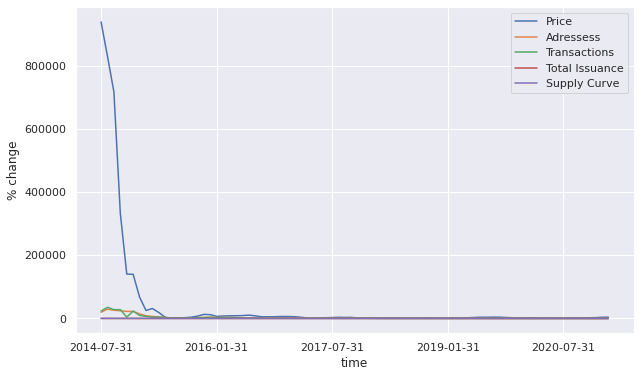

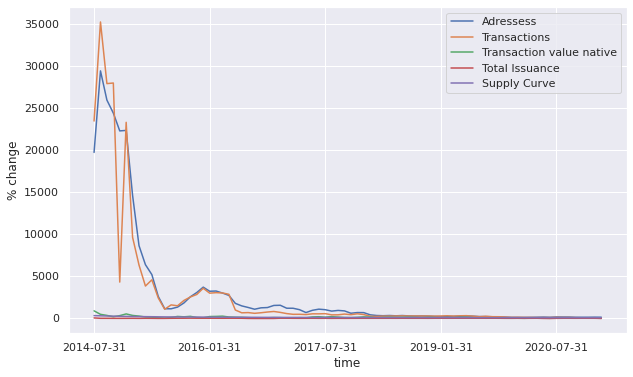

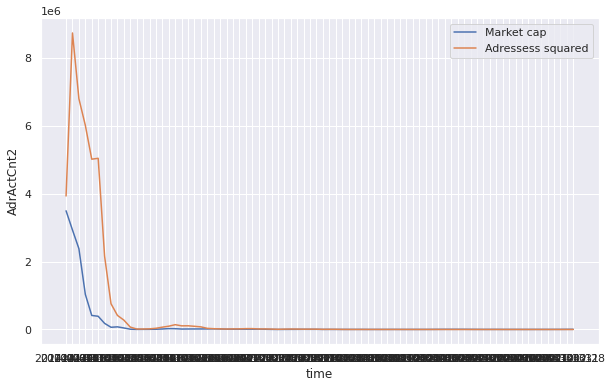

Index(['AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte', 'CapMVRVCur',
       'CapMrktCurUSD', 'CapRealUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD',
       'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate',
       'IssContNtv', 'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD',
       'NVTAdj', 'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d',
       'SplyCur', 'SplyExpFut10yrCMBI', 'SplyFF', 'TxCnt', 'TxTfrCnt',
       'TxTfrValAdjNtv', 'TxTfrValAdjUSD', 'TxTfrValMeanNtv',
       'TxTfrValMeanUSD', 'TxTfrValMedNtv', 'TxTfrValMedUSD', 'TxTfrValNtv',
       'TxTfrValUSD', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d',
       'block_height', 'halving_period', 'AdrActCnt2'],
      dtype='object')

In [256]:
#Monthly and weekly % changes. % change will be of four years to try to detrend the series. 
#We choose 4 years because that is the cycle duration of each bitcoin halving (When the new supply of bitcoins
#is cut in half).

monthly['AdrActCnt2'] = monthly['AdrActCnt'] ** 2
monthly_pct4 = monthly.pct_change(48).dropna() * 100
monthly_pct4.to_csv('../data/processed/monthly_pct4.csv')
#print((monthly_pct4.index))


#monthly_pct4 = monthly_pct4.loc['2017-01-31':]
plt.figure(figsize=(10,6))
sns.lineplot(y='PriceUSD', x=monthly_pct4.index, data= monthly_pct4, label='Price')
#sns.lineplot(y='CapMrktCurUSD', x=monthly_pct4.index, data= monthly_pct4, label='Market cap')
sns.lineplot(y='AdrActCnt', x=monthly_pct4.index, data= monthly_pct4, label='Adressess')
#sns.lineplot(y='AdrActCnt2', x=monthly_pct4.index, data= monthly_pct4, label='Adressess squared')
sns.lineplot(y='TxCnt', x=monthly_pct4.index, data= monthly_pct4, label='Transactions')
sns.lineplot(y='IssTotNtv', x=monthly_pct4.index, data= monthly_pct4, label='Total Issuance')
sns.lineplot(y='SplyCur', x=monthly_pct4.index, data= monthly_pct4, label='Supply Curve')
plt.ylabel('% change')
plt.xticks(np.arange(0, len(monthly_pct4 + 1), 18))
#plt.yscale('log')
plt.show()


plt.figure(figsize=(10,6))
sns.lineplot(y='AdrActCnt', x=monthly_pct4.index, data= monthly_pct4, label='Adressess')
sns.lineplot(y='TxCnt', x=monthly_pct4.index, data= monthly_pct4, label='Transactions')
sns.lineplot(y='TxTfrValAdjNtv', x=monthly_pct4.index, data= monthly_pct4, label='Transaction value native')
sns.lineplot(y='IssTotNtv', x=monthly_pct4.index, data= monthly_pct4, label='Total Issuance')
sns.lineplot(y='SplyCur', x=monthly_pct4.index, data= monthly_pct4, label='Supply Curve')
plt.ylabel('% change')
plt.xticks(np.arange(0, len(monthly_pct4 + 1), 18))
#plt.yscale('log')
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(y='CapMrktCurUSD', x=monthly_pct4.index, data= monthly_pct4, label='Market cap')
sns.lineplot(y='AdrActCnt2', x=monthly_pct4.index, data= monthly_pct4, label='Adressess squared')
plt.show()




monthly_pct4.columns

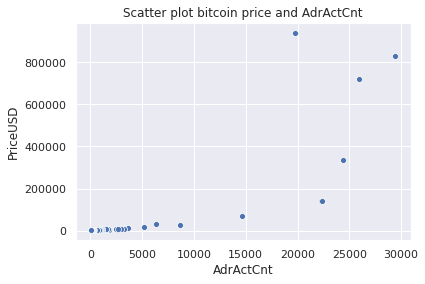

Pearson correlation coefficient: 0.81


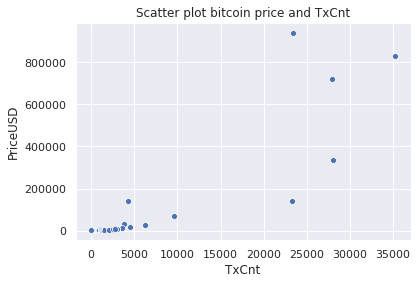

Pearson correlation coefficient: 0.88


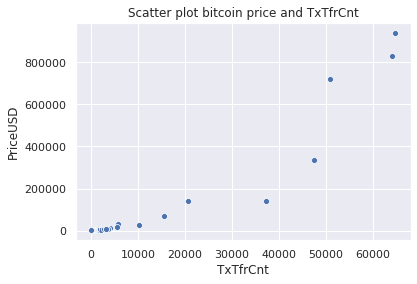

Pearson correlation coefficient: 0.94


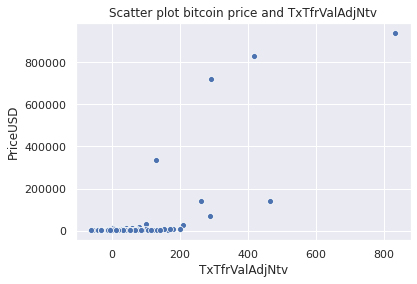

Pearson correlation coefficient: 0.75


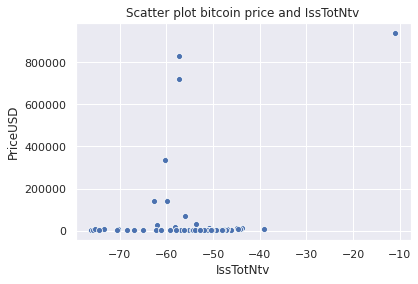

Pearson correlation coefficient: 0.27


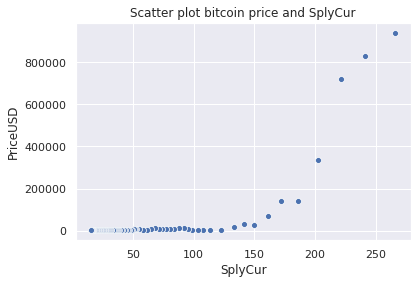

Pearson correlation coefficient: 0.75


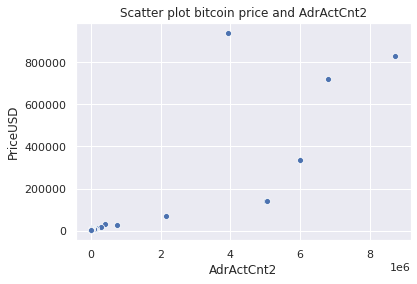

Pearson correlation coefficient: 0.84


In [257]:
#scatter plots of monthly variables after 4-year % change transformation.
variable_list = ['AdrActCnt', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'IssTotNtv', 'SplyCur', 'AdrActCnt2']

for variable in variable_list:
    sns.scatterplot(x=variable, y='PriceUSD', data=monthly_pct4)
    plt.title('Scatter plot bitcoin price and {}'.format(variable))
    plt.show()
    print('Pearson correlation coefficient: {}'.format(round(np.corrcoef(monthly_pct4['PriceUSD'], monthly_pct4[variable])[1][0], 2)))
    
#The variables of interest show a high correlation with the bitcoin price.

In [258]:
#ADF tests for monthly data 4y % change.
column_to_drop = ['FeeMedNtv', 'FeeMedUSD', 'NVTAdj90', 'ROI1yr', 'ROI30d', 'VtyDayRet180d', 'VtyDayRet30d',
                  'VtyDayRet60d', 'halving_period']

monthly_pct4_series = [[monthly_pct4[column], monthly_pct4[column].name] for column in monthly_pct4 if column not in column_to_drop]

monthly_pct4_series_adf_tests = adf_test(monthly_pct4_series, signif=0.05)

print('ADF test results for 4-year % change monthly data')
monthly_pct4_series_adf_tests.T

#All variables of interest are stationary after the 4-year % change transformation.

ADF test results for 4-year % change monthly data


/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


,Test Statistic,p-value,# Lags,# Observations,stationary at 5%
AdrActCnt,-2.56742,0.0999196,12,67,NO
BlkCnt,-8.35043,3.0051e-13,0,79,YES
BlkSizeByte,-4.68267,9.06937e-05,12,67,YES
BlkSizeMeanByte,-6.42444,1.75869e-08,11,68,YES
CapMVRVCur,-3.25347,0.0170911,1,78,YES
CapMrktCurUSD,-4.33734,0.000382528,12,67,YES
CapRealUSD,-23.1257,0,6,73,YES
DiffMean,-1.368,0.597515,6,73,NO
FeeMeanNtv,-3.44374,0.00955515,2,77,YES
FeeMeanUSD,-4.5138,0.00018565,1,78,YES


In [259]:
#cointegration tests for 4-year % change monthly data.
monthly_pct4_cointegration_tests = coint_test(monthly_pct4_series, price=monthly_pct4['PriceUSD'])
print('Cointegration test results 4-year % change monthly data with bitcoin price')
scaled_monthly_diff_cointegration_tests.T


/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1396: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn("y0 and y1 are (almost) perfectly colinear."


Cointegration test results 4-year % change monthly data with bitcoin price


,Test Statistic,p-value,cointegration at 5%
AdrActCnt,-0.746806,0.941345,NO
BlkCnt,-4.84,0.000320603,YES
BlkSizeByte,-5.19712,7.03245e-05,YES
BlkSizeMeanByte,-4.33895,0.00222464,YES
CapMVRVCur,-4.38439,0.00188463,YES
CapMrktCurUSD,-7.62928,2.53834e-10,YES
CapRealUSD,-8.39704,3.00084e-12,YES
DiffMean,-2.5111,0.274197,NO
FeeMeanNtv,-4.34759,0.0021559,YES
FeeMeanUSD,-0.484021,0.96545,NO


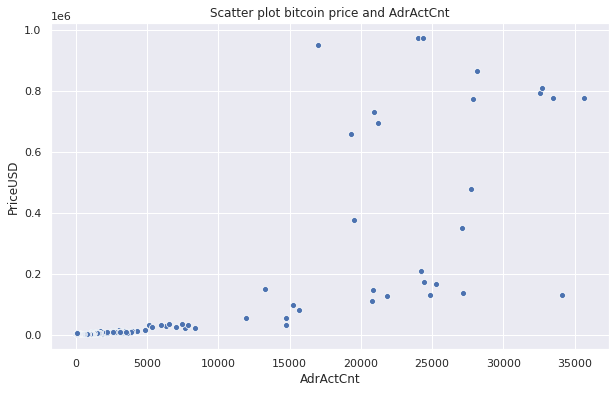

Pearson correlation coefficient: 0.81


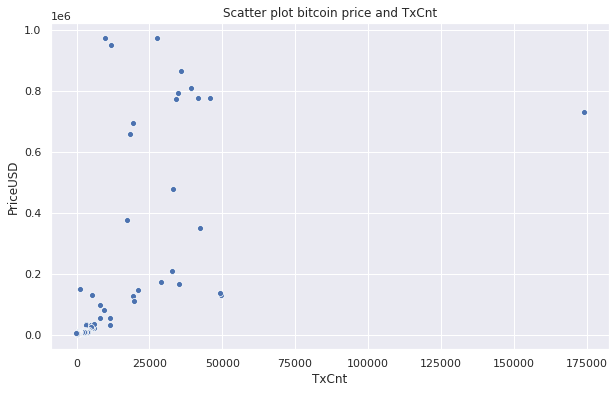

Pearson correlation coefficient: 0.65


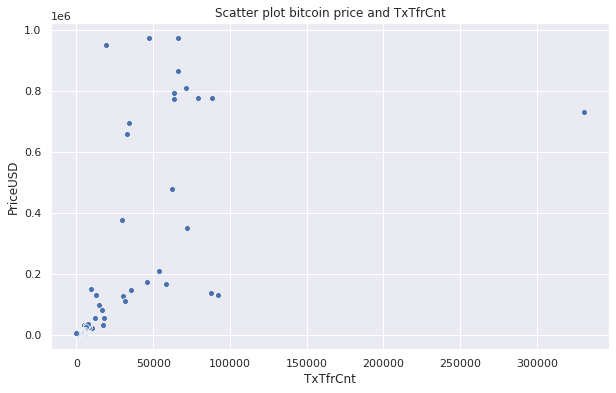

Pearson correlation coefficient: 0.68


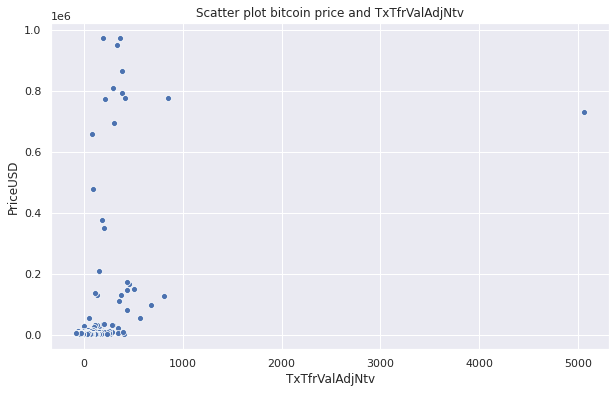

Pearson correlation coefficient: 0.42


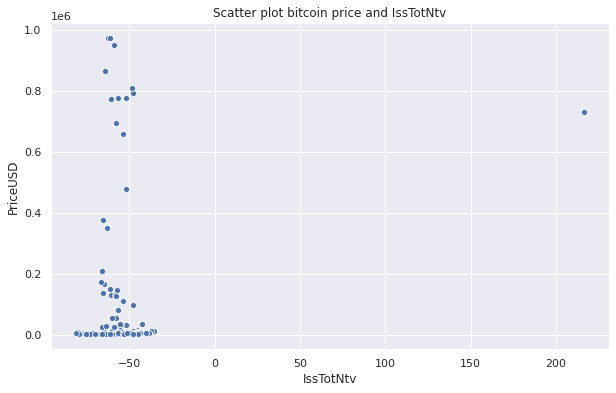

Pearson correlation coefficient: 0.17


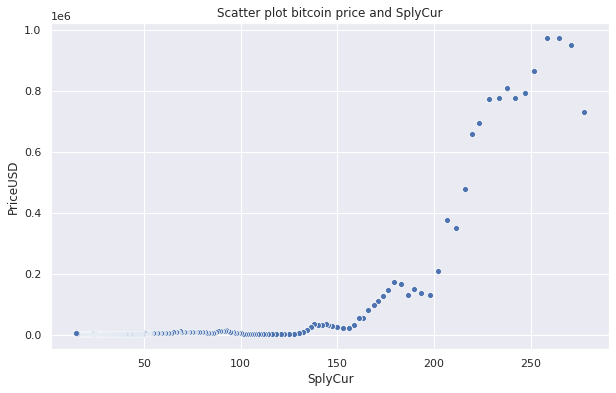

Pearson correlation coefficient: 0.74


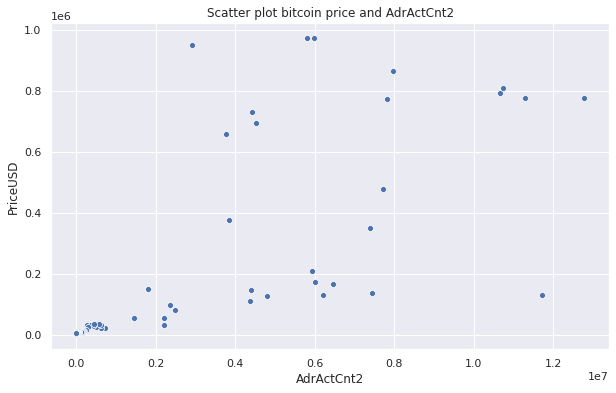

Pearson correlation coefficient: 0.81


In [260]:
#scatter plots of monthly variables after 4-year % change transformation.
variable_list = ['AdrActCnt', 'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'IssTotNtv', 'SplyCur', 'AdrActCnt2']

for variable in variable_list:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=variable, y='PriceUSD', data=weekly_pct4)
    plt.title('Scatter plot bitcoin price and {}'.format(variable))
    plt.show()
    print('Pearson correlation coefficient: {}'.format(round(np.corrcoef(weekly_pct4['PriceUSD'], weekly_pct4[variable])[1][0], 2)))
    
#The variables of interest show a high correlation with the bitcoin price.

In [261]:
#We will perform the same analysis of the4-year % change for the weekly data.
weekly['AdrActCnt2'] = weekly['AdrActCnt'] ** 2
weekly['S2F'] = weekly['SplyCur'] / (weekly['IssContNtv'] * 52)

weekly_pct4 = weekly.pct_change(208).dropna() * 100
weekly_pct4.to_csv('../data/processed/weekly_pct4.csv')

column_to_drop = ['FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv', 'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'NVTAdj90', 
                  'ROI1yr', 'ROI30d', 'VtyDayRet180d', 'VtyDayRet30d', 'VtyDayRet60d', 'halving_period']


weekly_pct4_series = [[weekly_pct4[column], weekly_pct4[column].name] for column in weekly_pct4 if column not in column_to_drop]

weekly_pct4_series_adf_tests = adf_test(weekly_pct4_series, signif=0.05)

print('ADF test results for 4-year % change weekly data')
weekly_pct4_series_adf_tests.T


#All variables of interest are stationary after the 4-year % change transformation.

/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


ADF test results for 4-year % change weekly data


,Test Statistic,p-value,# Lags,# Observations,stationary at 5%
AdrActCnt,-4.38343,0.000317536,14,331,YES
BlkCnt,-3.81764,0.0027319,4,341,YES
BlkSizeByte,-3.91111,0.00195456,17,328,YES
BlkSizeMeanByte,-16.7757,1.27612e-29,17,328,YES
CapMVRVCur,-3.23496,0.0180482,1,344,YES
CapMrktCurUSD,-3.94462,0.00172992,17,328,YES
CapRealUSD,-6.88242,1.42229e-09,17,328,YES
DiffMean,-5.16874,1.01804e-05,17,328,YES
HashRate,-3.43019,0.00997176,17,328,YES
IssContNtv,-3.99457,0.00143919,10,335,YES


In [262]:
#cointegration tests for 4-year % change weekly data.
monthly_pct4_cointegration_tests = coint_test(weekly_pct4_series, price=weekly_pct4['PriceUSD'])
print('Cointegration test results 4-year % change weekly data with bitcoin price')
scaled_monthly_diff_cointegration_tests.T


/home/julio/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1396: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn("y0 and y1 are (almost) perfectly colinear."


Cointegration test results 4-year % change weekly data with bitcoin price


,Test Statistic,p-value,cointegration at 5%
AdrActCnt,-0.746806,0.941345,NO
BlkCnt,-4.84,0.000320603,YES
BlkSizeByte,-5.19712,7.03245e-05,YES
BlkSizeMeanByte,-4.33895,0.00222464,YES
CapMVRVCur,-4.38439,0.00188463,YES
CapMrktCurUSD,-7.62928,2.53834e-10,YES
CapRealUSD,-8.39704,3.00084e-12,YES
DiffMean,-2.5111,0.274197,NO
FeeMeanNtv,-4.34759,0.0021559,YES
FeeMeanUSD,-0.484021,0.96545,NO


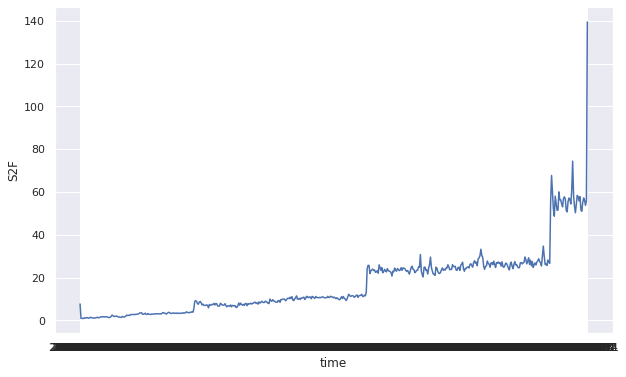

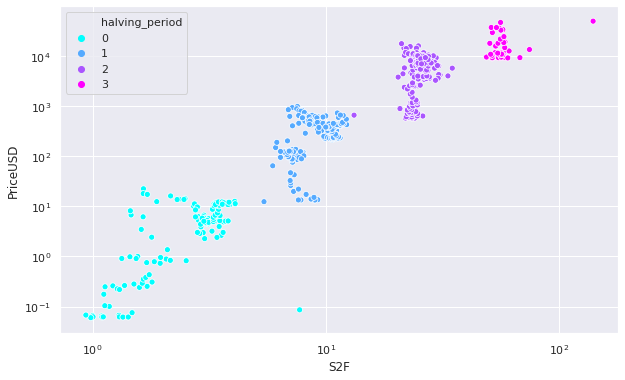

time
2021-01-24     57.259662
2021-01-31     56.156154
2021-02-07     53.752136
2021-02-14     55.976026
2021-02-21    139.482583
Name: S2F, dtype: float64

In [275]:
#S2F
plt.figure(figsize=(10,6))
sns.lineplot(x=weekly.index, y='S2F', data=weekly)
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='S2F', y='PriceUSD', data=weekly, hue='halving_period', palette='cool')
plt.yscale('log')
plt.xscale('log')

plt.show()


weekly['S2F'].tail()

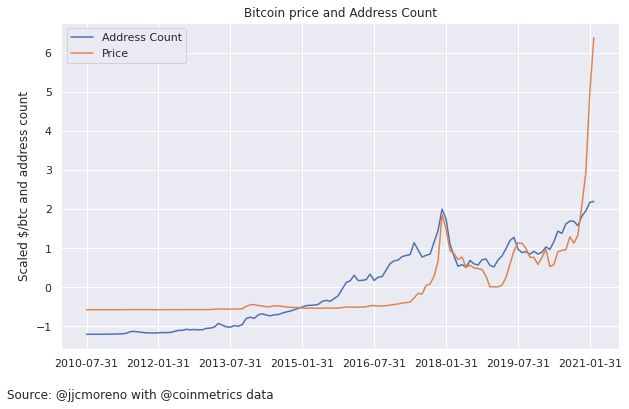

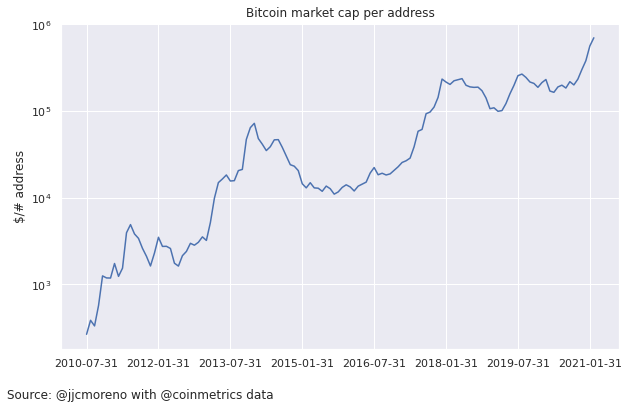

701840.0


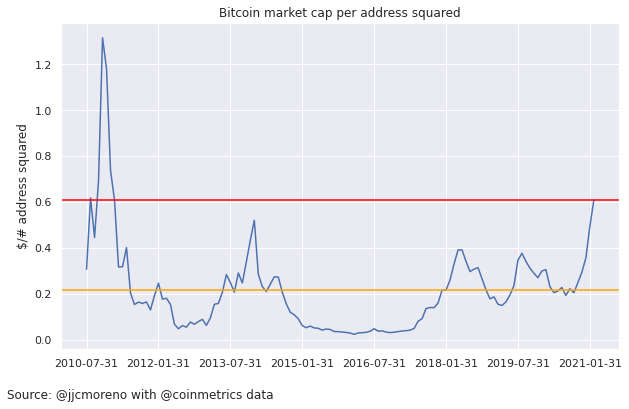

Last: 0.61
Mean: 0.22
Max: 1.32
Min: 0.02
Implied value at max: 1751366150937.3577


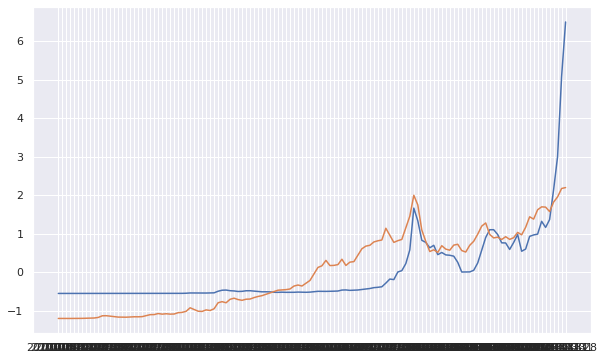

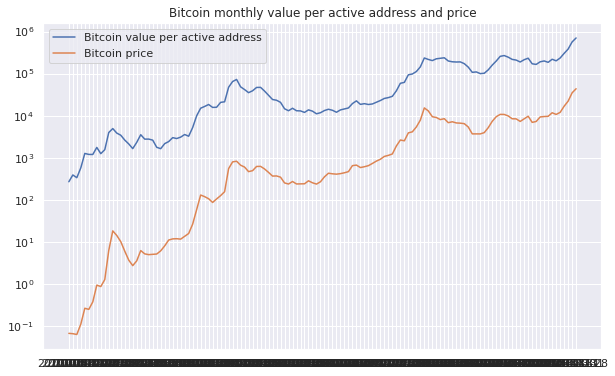

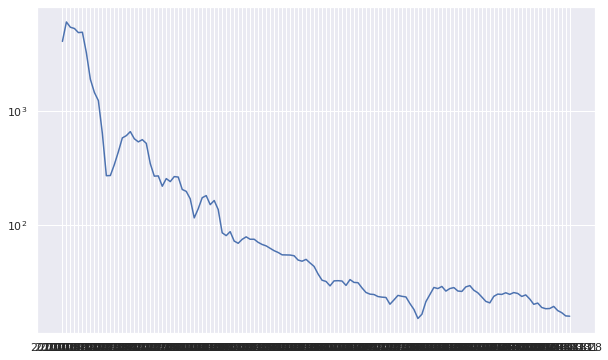

In [264]:
#Some plots
plt.figure(figsize=(10,6))
plt.plot(scaled_monthly_df['AdrActCnt'], label='Address Count')
plt.plot(scaled_monthly_df['PriceUSD'], label='Price')
plt.title('Bitcoin price and Address Count')
plt.ylabel('Scaled $/btc and address count')
plt.legend(loc='best')
plt.xticks(np.arange(0, len(scaled_monthly_df + 1), 18))
plt.figtext(0.05, 0.01, 'Source: @jjcmoreno with @coinmetrics data', horizontalalignment='left') 
plt.show()

avg_bitcoin_value_addr = monthly['CapMrktCurUSD']/monthly['AdrActCnt']
avg_bitcoin_value_addr_sq = monthly['CapMrktCurUSD']/monthly['AdrActCnt'] ** 2
avg_bitcoin_value_addr_scaled =  scaled_monthly_df['CapMrktCurUSD']/scaled_monthly_df['AdrActCnt']

plt.figure(figsize=(10,6))
plt.plot(avg_bitcoin_value_addr)
#plt.plot(monthly['PriceUSD'])
plt.ylabel('$/# address')
plt.title('Bitcoin market cap per address')
plt.yscale('log')
plt.xticks(np.arange(0, len(avg_bitcoin_value_addr + 1), 18))
plt.figtext(0.05, 0.01, 'Source: @jjcmoreno with @coinmetrics data', horizontalalignment='left') 
plt.show()

print(round(avg_bitcoin_value_addr[-1]))

plt.figure(figsize=(10,6))
plt.plot(avg_bitcoin_value_addr_sq)
plt.ylabel('$/# address squared')
plt.title('Bitcoin market cap per address squared')
plt.axhline(avg_bitcoin_value_addr_sq[-1], color='red')
plt.axhline(avg_bitcoin_value_addr_sq.mean(), color='orange')
plt.xticks(np.arange(0, len(avg_bitcoin_value_addr + 1), 18))
plt.figtext(0.05, 0.01, 'Source: @jjcmoreno with @coinmetrics data', horizontalalignment='left')
plt.savefig('../data/img/value_per_adr_2')
plt.show()
print('Last: {}'.format(round(avg_bitcoin_value_addr_sq[-1], 2)))
print('Mean: {}'.format(round(avg_bitcoin_value_addr_sq.mean(), 2)))
print('Max: {}'.format(round(avg_bitcoin_value_addr_sq.max(), 2)))
print('Min: {}'.format(round(avg_bitcoin_value_addr_sq.min(), 2)))
print('Implied value at max: {}'.format(avg_bitcoin_value_addr_sq.max()*monthly['AdrActCnt'][-1]**2))

plt.figure(figsize=(10,6))
plt.plot(scaled_monthly_df['CapMrktCurUSD'])
plt.plot(scaled_monthly_df['AdrActCnt'])
plt.show()

plt.figure(figsize=(10,6))
plt.plot(avg_bitcoin_value_addr, label='Bitcoin value per active address')
plt.plot(monthly['PriceUSD'], label='Bitcoin price')
#plt.plot(avg_bitcoin_value_addr / monthly['PriceUSD'])
plt.yscale('log')
plt.legend(loc='best')
plt.title('Bitcoin monthly value per active address and price')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(avg_bitcoin_value_addr / monthly['PriceUSD'])
plt.yscale('log')
plt.show()

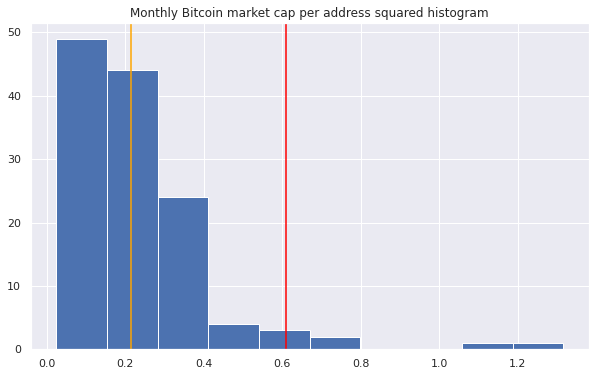

(-3.4327312704026443,
 0.009892403341884699,
 1,
 126,
 {'1%': -3.4833462346078936,
  '5%': -2.8847655969877666,
  '10%': -2.5791564575459813},
 -382.6372510479174)

In [265]:
#Histogram of market cap per address squared
plt.figure(figsize=(10,6))
plt.hist(avg_bitcoin_value_addr_sq, bins=10)
plt.title('Monthly Bitcoin market cap per address squared histogram')
plt.axvline(avg_bitcoin_value_addr_sq.mean(), color='orange')
plt.axvline(avg_bitcoin_value_addr_sq[-1], color='red')
plt.show()
#Histogram seems to show there are outliers.

#ADF test of market cap per address squared
adfuller(avg_bitcoin_value_addr_sq, autolag='AIC')
#ADF test signals series is stationary at 1%

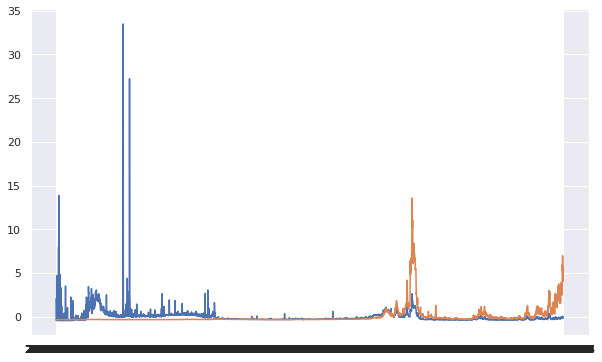

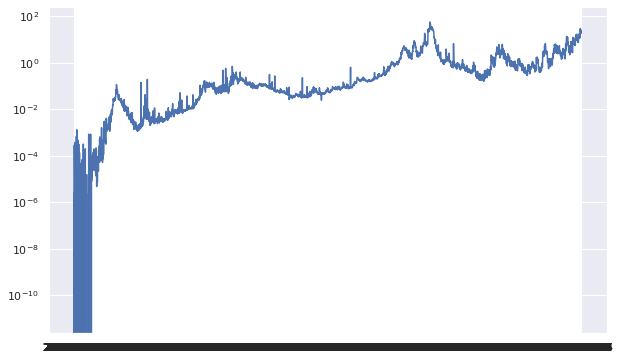

[]

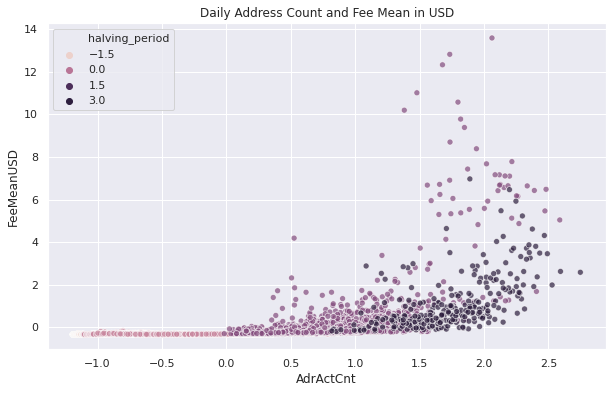

In [266]:
#Fee charts
plt.figure(figsize=(10,6))
plt.plot(scaled_daily_df['FeeMeanNtv'])
plt.plot(scaled_daily_df['FeeMeanUSD'])
plt.show()

plt.figure(figsize=(10,6))
plt.plot(daily['FeeMeanUSD'])
plt.yscale('log')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='AdrActCnt', y='FeeMeanUSD', data=scaled_daily_df, hue='halving_period', alpha=0.7)
plt.title('Daily Address Count and Fee Mean in USD')
plt.plot()



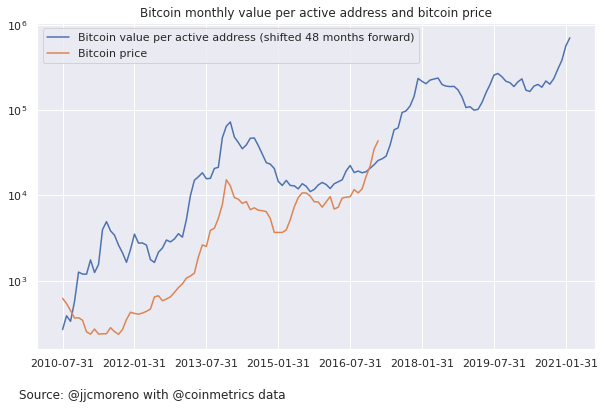

43467.3200170351
time
2020-01-31    213403.730611
2020-02-29    231687.568920
2020-03-31    170570.516171
2020-04-30    164806.521020
2020-05-31    190031.541098
2020-06-30    199266.111033
2020-07-31    184697.673395
2020-08-31    218621.791754
2020-09-30    200625.114713
2020-10-31    233850.192772
2020-11-30    301389.662412
dtype: float64


In [267]:
shifted_price_series = monthly['PriceUSD'].shift(periods=-48).fillna(np.NaN)
#shifted_price_series.index = pd.date_range(shifted_price_series.index[47], periods=len(shifted_price_series.index), freq='MS').shift(48, freq='M')
#avg_bitcoin_value_addr.index = pd.date_range(avg_bitcoin_value_addr.index[47], periods=len(avg_bitcoin_value_addr.index), freq='MS').shift(48, freq='M')
#print(shifted_price_series.index)

plt.figure(figsize=(10,6))
plt.plot(avg_bitcoin_value_addr, label='Bitcoin value per active address (shifted 48 months forward)')
plt.plot(shifted_price_series, label='Bitcoin price')
#plt.plot(avg_bitcoin_value_addr / monthly['PriceUSD'])
plt.yscale('log')
plt.legend(loc='best')
plt.title('Bitcoin monthly value per active address and bitcoin price')
plt.xticks(np.arange(0, len(avg_bitcoin_value_addr + 1), 18))
plt.figtext(0.1, 0.01, 'Source: @jjcmoreno with @coinmetrics data', horizontalalignment='left') 
plt.savefig('../data/img/valuePerAddrPriceShift.png')
plt.show()

print(monthly['PriceUSD'].iloc[-1])
print(avg_bitcoin_value_addr.loc['2020-01-01': '2020-12-01'])
